In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Movie Profitability #


## Steps In our process: ##


1. ### Import and clean our data ###
    * Movie Budget data is from https://www.the-numbers.com/movie/budgets/all
    * Market data is from https://finance.yahoo.com/quote/SPY?p=SPY&.tsrc=fin-srch  
      
2. ### Explore data with charts ###
    * Looking at summaries is a great way to get a feel for a data set.
    * We identified profit percentage as a metric to investigate
3. ### Analyze the data ###
    * For this data set we analyzed our data for insights mainly by creating and looking at graphs
4. ### Use Analysis to make recommendations
    * From our graphs we came ups with some concrete recomendation based on budget, compettion, market conditions and season.

In [45]:
#below should go in .py
df=pd.read_csv('./zippedData/tn.movie_budgets.csv.gz',error_bad_lines=False)
df.rename(columns={"movie":"title"}, inplace=True)
df.production_budget=df.production_budget.apply(lambda x: x.strip('$'))
df.production_budget=df.production_budget.replace({",":''}, regex=True).apply(pd.to_numeric)
df.domestic_gross=df.domestic_gross.apply(lambda x: x.strip('$'))
df.domestic_gross=df.domestic_gross.replace({",":''}, regex=True).apply(pd.to_numeric)
df.worldwide_gross=df.worldwide_gross.apply(lambda x: x.strip('$'))
df.worldwide_gross=df.worldwide_gross.replace({",":''}, regex=True).apply(pd.to_numeric)

df['domestic_profit']=df.domestic_gross-df.production_budget
df['worldwide_profit']=df.worldwide_gross-df.production_budget
df.release_date=pd.to_datetime(df.release_date)
df['release_year'] = df['release_date'].dt.to_period('Y')

df['profit_margin']=df.worldwide_profit/df.production_budget

bydates=df.sort_values(by = 'release_date')
low_cutoff=pd.to_datetime('2000')
high_cutoff=pd.to_datetime('2019')
bydate=bydates.loc[(bydates.release_date >low_cutoff)&(bydates.release_date<high_cutoff)]

df2=bydate.groupby('release_year').mean().reset_index()
tn_movie_budgets=df



Below is a printout of the top ten entries in the database sorted by production budget.  
Change the variable below to show the top ten movies in the data sorted by different columns.  

In [46]:
column_to_sort_by='production_budget' # Change this to any of the column names printed below to sort by that column
tn_movie_budgets.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'domestic_profit', 'worldwide_profit',
       'release_year', 'profit_margin'],
      dtype='object')

In [47]:
tn_movie_budgets.sort_values(by=[column_to_sort_by], ascending=False).head(10)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_year,profit_margin
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,2009,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,2011,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,2019,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,2015,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,2017,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,2015,5.710167
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,2018,5.827114
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,9420425,663420425,2007,2.211401
8,9,2017-11-17,Justice League,300000000,229024295,655945209,-70975705,355945209,2017,1.186484
9,10,2015-11-06,Spectre,300000000,200074175,879620923,-99925825,579620923,2015,1.932070


Below we have a chart that shows us the summary statistics of each of the numeric data columns.

In [48]:
tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,profit_margin
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,1.028557e+07,5.989970e+07,3.800161
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,4.992137e+07,1.460889e+08,29.530282
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-3.072376e+08,-2.002376e+08,-1.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-9.132757e+06,-2.189071e+06,-0.507704
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,-3.487755e+05,8.550286e+06,0.708310
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,1.778144e+07,6.096850e+07,2.758346
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,6.306622e+08,2.351345e+09,1799.000000


After exploring the data, we decided that we wanted to take a deeper look and come up with some insights about profitability.

# Exploring Profitability with Graphs #  


The first thing we decided to do was constrict our search to only movies from the last ten years, and then just look at the distributions of profitability for each year.


In [49]:
bydate['profit_margin_outlier']=bydate.groupby('release_year')['profit_margin'].rank(pct=True)

In [50]:
bydate.describe()

,id,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,profit_margin,profit_margin_outlier
count,4317.00000,4.317000e+03,4.317000e+03,4.317000e+03,4.317000e+03,4.317000e+03,4317.000000,4317.000000
mean,50.06347,3.418395e+07,4.184513e+07,9.695731e+07,7.661179e+06,6.277337e+07,2.379991,0.502201
std,28.58593,4.515917e+07,7.129978e+07,1.862779e+08,4.864199e+07,1.533677e+08,12.725400,0.288353
min,1.00000,1.100000e+03,0.000000e+00,0.000000e+00,-2.019413e+08,-1.104502e+08,-1.000000,0.004762
25%,25.00000,5.000000e+06,5.920140e+05,2.772511e+06,-1.000000e+07,-2.238995e+06,-0.589041,0.250000
50%,50.00000,1.800000e+07,1.541777e+07,2.957503e+07,-1.000000e+06,7.781305e+06,0.556036,0.502283
75%,75.00000,4.200000e+07,5.175860e+07,1.013793e+08,1.363892e+07,6.333214e+07,2.408423,0.752101
max,100.00000,4.250000e+08,9.366622e+08,2.776345e+09,6.306622e+08,2.351345e+09,430.517853,1.000000


In [59]:
bydate_temp=bydate[bydate['profit_margin_outlier']<=0.975]
bydate_temp.describe()


,id,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,profit_margin,profit_margin_outlier
count,4200.000000,4.200000e+03,4.200000e+03,4.200000e+03,4.200000e+03,4.200000e+03,4200.000000,4200.000000
mean,49.989048,3.496855e+07,4.142616e+07,9.599845e+07,6.457614e+06,6.102990e+07,1.292730,0.488650
std,28.648702,4.550446e+07,7.142231e+07,1.867561e+08,4.782464e+07,1.529447e+08,2.636329,0.280510
min,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,-2.019413e+08,-1.104502e+08,-1.000000,0.004762
25%,25.000000,5.500000e+06,5.219488e+05,2.507176e+06,-1.042017e+07,-2.500000e+06,-0.619303,0.242521
50%,50.000000,2.000000e+07,1.497680e+07,2.867632e+07,-1.200000e+06,6.919874e+06,0.491773,0.488610
75%,75.000000,4.500000e+07,5.098990e+07,9.886925e+07,1.201209e+07,6.013643e+07,2.204166,0.731842
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,6.306622e+08,2.351345e+09,23.893677,0.974895


Text(0.5, 1.0, 'Distribution of Profit Percentage by Year')

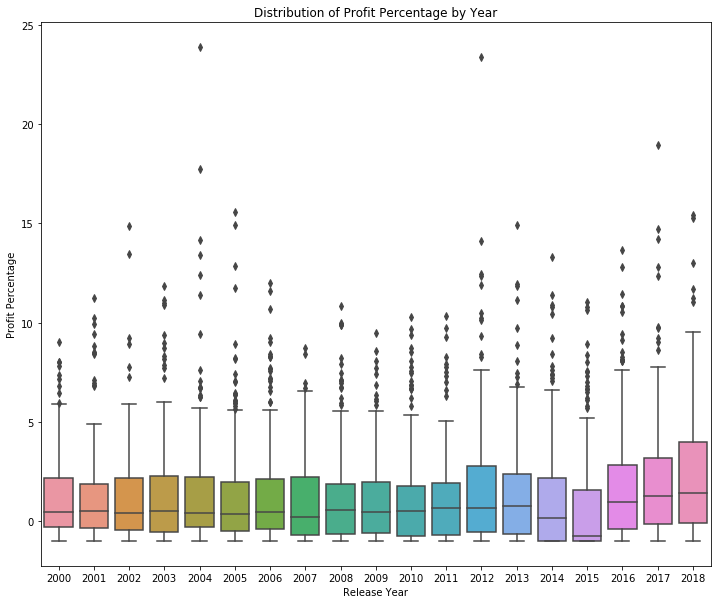

In [60]:
#this code should go in .py file

#tn_movie_budgets.sort_values(by=[column_to_sort_by], ascending=False)
plt.figure(figsize=(12,10))
plot2 = sns.boxplot(x="release_year", y="profit_margin", data=bydate_temp)
plot2.set(xlabel='Release Year', ylabel='Profit Percentage')
plot2.set_title('Distribution of Profit Percentage by Year')

Just by looking at the distribution we can learn a great deal about our data. It looks like the vast majority of films make less than 